In [ ]:
#https://www.youtube.com/watch?v=j-3vuBynnOE

In [6]:
import cv2
import os
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt

In [7]:
#To load an image file in pyhton

jpgfile = Image.open("my-image.png")
print( jpgfile.size, jpgfile.format)

(101, 101) PNG


In [8]:
DATADIR = "C:/Users/sandy/train"
CATEGORIES = ["Happy", "Neutral"]

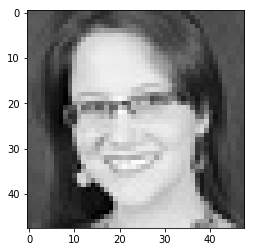

In [9]:
for category in CATEGORIES:
    path= os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    

In [10]:
print(img_array)

[[ 79  77  79 ...  73  77  77]
 [ 83  82  82 ...  74  81  77]
 [ 86  86  84 ...  74  79  78]
 ...
 [ 64  68  70 ...  63  77  60]
 [ 67  70  74 ...  47  67  77]
 [ 67  81  78 ... 122  71  67]]


In [11]:
print(img_array.shape)

(48, 48)


In [7]:
#Resizing the image

#IMG_SIZE = 50


#new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
#plt.imshow(new_array, cmap = "gray")
#plt.show()
#print(new_array.shape)

In [13]:
#Training data
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path= os.path.join(DATADIR, category)  #Path for the Happy, Neutral images
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                training_data.append([img_array, class_num])
            except Exception as e:
                pass

create_training_data()  

In [14]:
print(len(training_data))

12220


In [15]:
#shuffle the data

import random

random.shuffle(training_data)

In [16]:
#checking the labels are shuffled using sample
    
for sample in training_data[:10]:
    print(sample[1])

0
1
1
0
1
0
0
0
1
0


In [17]:
X = [] #Feature
y = [] #Label

In [18]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
img_array = 48

#For reshapping 
X= np.array(X).reshape(-1, img_array, img_array, 1)

In [19]:
import pickle

# Using pickle to save the data, also we can use numpy to save the data
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [20]:
pickle_in = open("X.pickle", "rb")
X= pickle.load(pickle_in)

In [21]:
X[1]

array([[[ 13],
        [ 48],
        [ 60],
        ...,
        [119],
        [ 80],
        [ 43]],

       [[ 38],
        [ 67],
        [ 39],
        ...,
        [109],
        [118],
        [ 74]],

       [[ 84],
        [ 80],
        [ 67],
        ...,
        [112],
        [132],
        [ 89]],

       ...,

       [[255],
        [255],
        [255],
        ...,
        [ 37],
        [183],
        [199]],

       [[255],
        [255],
        [255],
        ...,
        [ 81],
        [213],
        [197]],

       [[254],
        [255],
        [255],
        ...,
        [151],
        [199],
        [193]]], dtype=uint8)

In [22]:
y[3]

0

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

C:\Users\sandy\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sandy\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\sandy\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\sandy\AppData\Roaming\Python\Python36\site-

In [24]:
Name = "smilemodel-{}".format(int(time.time()))
logdir= "C:\\Users\\sandy\\train\\{}".format(Name)
tensorboard = TensorBoard(logdir)

X = pickle.load( open("X.pickle", "rb"))
y = pickle.load( open("y.pickle", "rb"))

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape= X.shape[1:])) #64 Convolution units, 3,3 is window size and shape
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), input_shape= X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
    

model.add(Flatten()) #THis converts our 3D feature maps to 1D feature

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", #we can use categorical for more than 2 labels
             optimizer="adam",
             metrics=["accuracy"])

model.fit(X, y, batch_size= 32, epochs=10, validation_split=0.1, callbacks=[tensorboard]) 



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 10998 samples, validate on 1222 samples
Epoch 1/10
10998/10998 [==============================] - 67s 6ms/sample - loss: 0.5766 - acc: 0.6952 - val_loss: 0.4555 - val_acc: 0.8069
Epoch 2/10
10998/10998 [==============================] - 66s 6ms/sample - loss: 0.4609 - acc: 0.7853 - val_loss: 0.4240 - val_acc: 0.8151
Epoch 3/10
10998/10998 [==============================] - 68s 6ms/sample - loss: 0.4149 - acc: 0.8088 - val_loss: 0.3907 - val_acc: 0.8273
Epoch 4/10
10998/10998 [==============================] - 74s 7ms/sample - loss: 0.3818 - acc: 0.8269 - val_loss: 0.3909 - val_acc: 0.8257
Epoch 5/10
10998/10998 [==============================] - 73s 7ms/sample - loss: 0.3569 - acc: 0.8365 - val_loss: 0.3631 - val_acc: 0.8314
Epoch 6/10
10998/10998 [====================

In [25]:
model.save('train.model')

In [76]:
#Analysing models with Tensorboard

#tensorboard --logdir=foo:"C:\Users\sandy\train" in Anaconda prompt
#connecting using the command to see the visualisation in Tensorboard

In [75]:
#Optimisation with Tensorboard

dense_layers = [0,1,2]
layer_sizes = [32,64,128]
conv_layers = [1,2,3]


for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for con_layer in conv_layers:
            Name = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layers, layer_sizes, dense_layers, int(time.time()))
            logdir= "C:\\Users\\sandy\\train\\{}".format(Name)
            tensorboard = TensorBoard(logdir)
            print(Name)
            model = Sequential()

            model.add(Conv2D(layer_size, (3,3), input_shape= X.shape[1:])) #64 Convolution units, 3,3 is window size and shape
            model.add(Activation("relu"))
            model.add(MaxPooling2D(pool_size=(2,2)))
                
            for l in range(con_layer-1):
                model.add(Conv2D(layer_size, (3,3), input_shape= X.shape[1:]))
                model.add(Activation("relu"))
                model.add(MaxPooling2D(pool_size=(2,2)))
    

            model.add(Flatten()) #THis converts our 3D feature maps to 1D feature

            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation("relu"))
                model.add(Dropout(0.2))
            

            model.add(Dense(1))
            model.add(Activation("sigmoid"))

            model.compile(loss="binary_crossentropy", #we can use categorical for more than 2 labels
            optimizer="adam",
            metrics=["accuracy"])

            model.fit(X, y, batch_size= 32, epochs=20, validation_split=0.1, callbacks=[tensorboard]) 

            

'\ndense_layers = [0,1,2]\nlayer_sizes = [32,64,128]\nconv_layers = [1,2,3]\n\n\nfor dense_layer in dense_layers:\n    for layer_size in layer_sizes:\n        for con_layer in conv_layers:\n            Name = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layers, layer_sizes, dense_layers, int(time.time()))\n            logdir= "C:\\Users\\sandy\\train\\{}".format(Name)\n            tensorboard = TensorBoard(logdir)\n            print(Name)\n            model = Sequential()\n\n            model.add(Conv2D(layer_size, (3,3), input_shape= X.shape[1:])) #64 Convolution units, 3,3 is window size and shape\n            model.add(Activation("relu"))\n            model.add(MaxPooling2D(pool_size=(2,2)))\n                \n            for l in range(con_layer-1):\n                model.add(Conv2D(layer_size, (3,3), input_shape= X.shape[1:]))\n                model.add(Activation("relu"))\n                model.add(MaxPooling2D(pool_size=(2,2)))\n    \n\n            model.add(Flatten()) #THis conve

In [26]:
#prediction
CATEGORIES = ["Happy", "Neutral"]

def prepare(filepath):
    IMG_SIZE = 48
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model1 = tf.keras.models.load_model("train.model")

prediction = model1.predict([prepare("SandyAngry.jpg")])

print(prediction)


prediction = model.predict([prepare("SandyAngry.jpg")])
print(CATEGORIES[int(prediction[0][0])])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
[[0.]]
Happy


In [27]:
prediction = model.predict([prepare("Sundarsmile.jpg")])
print(CATEGORIES[int(prediction[0][0])])

Happy


In [28]:
prediction = model.predict([prepare("Sundarsmile.jpg")])
print(CATEGORIES[int(prediction[0][0])])

Happy


In [29]:
prediction = model.predict([prepare("my-image.png")])
print(CATEGORIES[int(prediction[0][0])])



Neutral
